# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [13]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [14]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [30]:
# Import the necessary CSVs to Pandas DataFrames
file_path = Path("sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()
columns = ["Neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"]
sfo_data.columns = columns
sfo_data

sfo_mean = sfo_data.groupby(['year']).mean()
sfo_mean

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560,1239
2011,341.903429,374507,1530
2012,399.389968,376454,2324
2013,483.600304,378401,2971
2014,556.277273,380348,3528
2015,632.540352,382295,3739
2016,697.643709,384242,4390


In [17]:
file_path2 = Path("neighborhoods_coordinates.csv")
neighborhood_coordinates = pd.read_csv(file_path2, index_col="Neighborhood")
neighborhood_coordinates.head()

,Lat,Lon
Neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050


In [46]:
file_path1 = Path("mean_units.csv")
mean_units = pd.read_csv(file_path1)
mean_units

,housing_units
0,372560
1,374507
2,376454
3,378401
4,380348
5,382295
6,384242


In [68]:
# Added this code so I can use below in plots
sfo_means = sfo_data.groupby(['year', 'Neighborhood']).mean()
sfo_means

avg_grossrent = sfo_mean[['gross_rent']]
avg_grossrent

avg_sqrfoot = sfo_mean[['sale_price_sqr_foot']]
avg_sqrfoot.round(2)

sfo_exp = sfo_data.groupby(['Neighborhood']).mean()
sfo_exp

sfo_exp_sqft = sfo_exp[['sale_price_sqr_foot']]
sfo_exp_sqft

sfo_exp_sqft = sfo_exp_sqft.sort_values(by=['sale_price_sqr_foot'])
sfo_10exp = sfo_exp_sqft.tail(10)
sfo_10exp

,sale_price_sqr_foot
Neighborhood,
South Beach,650.124479
Potrero Hill,662.013613
Cow Hollow,665.964042
Presidio Heights,675.350212
Telegraph Hill,676.506578
Westwood Park,687.087575
Pacific Heights,689.555817
Miraloma Park,779.810842
Merced Heights,788.844818


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

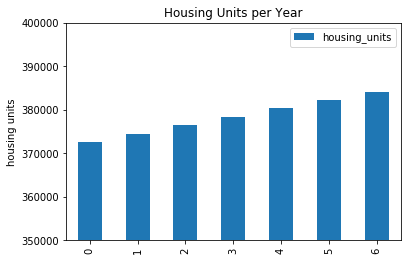

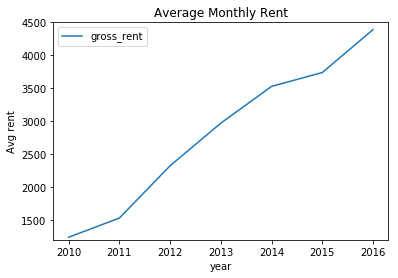

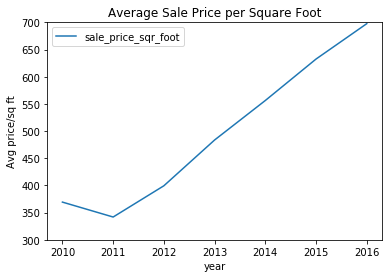

In [69]:
# Define Panel Visualization Functions
#def housing_units_per_year():
#    """Housing Units Per Year."""
mean_units_plot = mean_units.plot.bar(title="Housing Units per Year", ylabel="housing units", ylim=(350000,400000))
    
#def average_gross_rent():
#    """Average Gross Rent in San Francisco Per Year."""
avg_grossrent_plot = avg_grossrent.plot(ylim=(1200,4500), title="Average Monthly Rent", ylabel='Avg rent')

#def average_sales_price():
#    """Average Sales Price Per Year."""
avg_sqrfoot_plot = avg_sqrfoot.plot(ylim=(300,700), title="Average Sale Price per Square Foot", ylabel='Avg price/sq ft')

#def average_price_by_neighborhood():
#    """Average Prices by Neighborhood."""
sfo_means_plot = sfo_means.hvplot.line(x="year", y="sale_price_sqr_foot", xlabel="Year", ylabel="Average price/sq ft", groupby="Neighborhood", title="Average Price/Sq Foot By Neighborhood")

#def top_most_expensive_neighborhoods():
#    """Top 10 Most Expensive Neighborhoods."""
sfo_10exp_plot = sfo_10exp.hvplot.bar(ylim=(600,1000), title="Top 10 Most Expensive Neighborhoods", rot=45)

#def most_expensive_neighborhoods_rent_sales():
#    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
sfo_rentprice_plot = sfo_means.hvplot(ylabel="dollars", xlabel="year", title="Rent vs Price", groupby="Neighborhood")
 
#def neighborhood_map():
#    """Neighborhood Map."""  
# def parallel_coordinates():
#    """Parallel Coordinates Plot."""
# def parallel_categories():
#    """Parallel Categories Plot."""
# def sunburst():
#   """Sunburst Plot."""
# OPTIONAL CHALLENGES - DID NOT COMPLETE

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [75]:
# Create a Title for the Dashboard
mean_units_column = pn.Column("## Housing Units Per Year", mean_units_plot)
avg_grossrent_column = pn.Column("## Average Gross Rent", avg_grossrent_plot)
avg_sqrfoot_column = pn.Column("## Average Price/Sq Ft", avg_sqrfoot_plot)
sfo_rentprice_column = pn.Column("## Rent Vs Price", sfo_rentprice_plot)
sfo_10exp_column = pn.Column("## 10 Most Expensive", sfo_10exp_plot)
sfo_means_column = pn.Column("## 10 Most Expensive Rent", sfo_means_plot)

# Create a tab layout for the dashboard
dashboard = pn.Tabs(
    (
        "Housing Units Per Year",
        mean_units_column
    ),
    (
        "Average Gross Rent",
        avg_grossrent_column
    ),
     (
        "Average Price/Sq Ft",
        avg_sqrfoot_column
    ),
    (
        "Rent Vs Price",
        sfo_rentprice_plot
    ),
   (
        "10 Most Expensive",
        sfo_10exp_plot
    ),
    (
        "10 Most Expensive Rent",
        sfo_means_plot
    ),
)

dashboard


# Create the dashboard
dashboard = pn.Row(mean_units_plot)
dashboard.append(avg_grossrent_plot)
dashboard.append(avg_sqrfoot_plot)
dashboard.append(sfo_rentprice_plot)
dashboard.append(sfo_10exp_plot)
dashboard.append(sfo_means_plot)
dashboard

# Note: I am not sure why the tabs did not show below?

Row
    [0] Column
        [0] Markdown(str)
        [1] Str(AxesSubplot)
    [1] Column
        [0] Markdown(str)
        [1] Str(AxesSubplot)
    [2] Str(AxesSubplot)
    [3] Row
        [0] HoloViews(DynamicMap)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), name='Neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
            [1] VSpacer()
    [4] HoloViews(Bars)
    [5] Row
        [0] HoloViews(DynamicMap)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), name='Neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
            [1] VSpacer()

## Serve the Panel Dashboard

In [76]:
# Serve the# dashboard
dashboard.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] Str(AxesSubplot)
    [1] Column
        [0] Markdown(str)
        [1] Str(AxesSubplot)
    [2] Str(AxesSubplot)
    [3] Row
        [0] HoloViews(DynamicMap)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), name='Neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
            [1] VSpacer()
    [4] HoloViews(Bars)
    [5] Row
        [0] HoloViews(DynamicMap)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), name='Neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
            [1] VSpacer()

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [ ]:
# housing_units_per_year()

In [ ]:
# average_gross_rent()

In [ ]:
# average_sales_price()

In [ ]:
# average_price_by_neighborhood()

In [ ]:
# top_most_expensive_neighborhoods()

In [ ]:
# most_expensive_neighborhoods_rent_sales()

In [ ]:
# neighborhood_map().show()

In [ ]:
# parallel_categories()

In [ ]:
# parallel_coordinates()

In [ ]:
# sunburst()